### The Randomized Benchmarking Protocol
This Python script demonstrates the Randomized Benchmarking Protocol using the Qiskit framework, a quantum computing library for Python. The Randomized Benchmarking Protocol is a technique employed in quantum computing to assess the error rates of quantum gates by subjecting qubits to sequences of randomly chosen gates.

The script defines a function random_unitary to apply a randomly generated unitary gate to a specified qubit. The main function randomized_benchmarking conducts the benchmarking experiment for a given qubit, varying the number of Clifford gates applied. The fidelity, representing the accuracy of quantum operations, is calculated based on the outcomes of quantum measurements.

The experiment is run for different numbers of Clifford gates, and the resulting fidelities are printed. Subsequently, a plot is generated to visualize the relationship between the number of Clifford gates and the corresponding fidelities. The x-axis represents the number of Clifford gates, and the y-axis represents the fidelity.

Note that the script utilizes the Qiskit Aer simulator ('qasm_simulator') for simulating quantum computations and generating measurement outcomes. Any errors during the execution of the experiment are caught and displayed, ensuring a graceful handling of exceptions. The script serves as a practical example of how to implement and visualize the Randomized Benchmarking Protocol using Qiskit.

In [1]:
# !pip install qutip
# !pip install qiskit
# !pip install qiskit-aer

In [2]:
import qiskit
from qiskit import QuantumCircuit, transpile, execute, Aer
from qiskit.visualization import plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# A function to implement a random gate
def random_unitary(qubit, circuit):
    """Apply a random unitary gate to the given qubit."""
    random_matrix = qiskit.quantum_info.random_unitary(2).data
    circuit.unitary(random_matrix, qubit)

In [4]:
# The RB experiment function
def randomized_benchmarking(qubit, num_cliffords, shots):
    """Run the Randomized Benchmarking experiment."""
    backend = Aer.get_backend('qasm_simulator')
    results = []

    for num_clifford in num_cliffords:
        qr = qiskit.QuantumRegister(qubit + 1, 'q')
        cr = qiskit.ClassicalRegister(qubit + 1, 'c')
        rb_circuit = QuantumCircuit(qr, cr)
        for _ in range(num_clifford):
            random_unitary(qr[qubit], rb_circuit)
        rb_circuit.measure(qr, cr)

        transpiled_circuit = transpile(rb_circuit, backend=backend)

        job = execute(transpiled_circuit, backend, shots=shots)
        counts = job.result().get_counts()

        initial_state = '0' * (qubit + 1)
        fidelity = counts.get(initial_state, 0) / shots
        results.append(fidelity)

    return results


In [5]:
qubit = 0  # Qubit to be benchmarked
num_cliffords = [1, 10, 20, 50, 75, 100]  # Number of Clifford gates to apply
shots = 1024  # Number of shots for each experiment

Fidelity after 1 Cliffords: 0.3486
Fidelity after 10 Cliffords: 0.7354
Fidelity after 20 Cliffords: 0.5068
Fidelity after 50 Cliffords: 0.8691
Fidelity after 75 Cliffords: 0.3936
Fidelity after 100 Cliffords: 0.3770


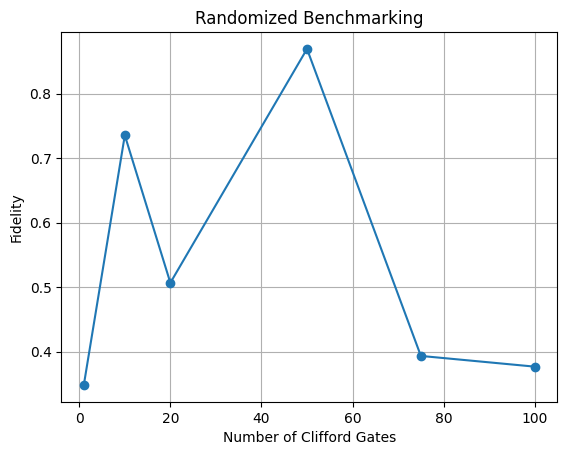

In [6]:
try:
    # Running the Randomized Benchmarking experiment
    fidelities = randomized_benchmarking(qubit, num_cliffords, shots)
    for i, num_clifford in enumerate(num_cliffords):
        print(f"Fidelity after {num_clifford} Cliffords: {fidelities[i]:.4f}")

    # Plotting the results
    plt.plot(num_cliffords, fidelities, marker='o')
    plt.xlabel('Number of Clifford Gates')
    plt.ylabel('Fidelity')
    plt.title('Randomized Benchmarking')
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")